In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

%matplotlib inline
plt.style.use('fivethirtyeight')
#sns.set_style()

In [213]:
tips = sns.load_dataset('tips')

In [214]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [215]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [216]:
tips.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


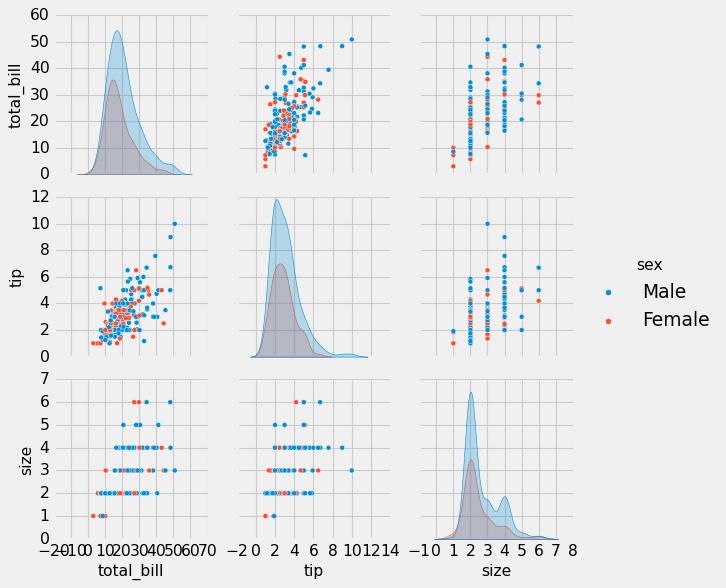

In [217]:
sns.pairplot(tips, hue = 'sex')

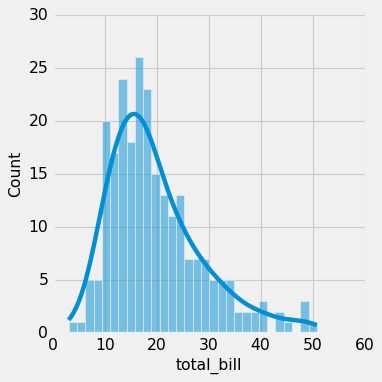

In [218]:
#bins = [0,50,1]
sns.displot(tips['total_bill'], kde=True, bins = 30)

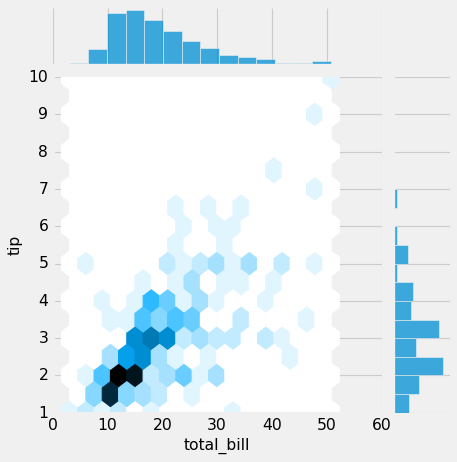

In [219]:
sns.jointplot(x = tips['total_bill'], y = tips['tip'], kind = 'hex')


<Axes: xlabel='day', ylabel='count'>

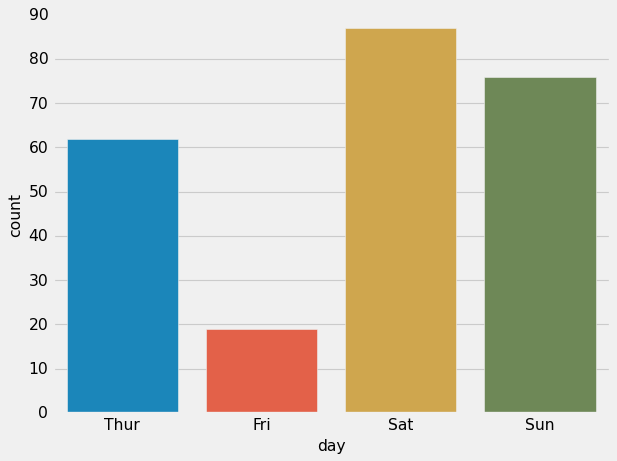

In [220]:
sns.countplot(x = tips['day'])

In [221]:
tips_bill = tips['total_bill']
tips_tip = tips['tip']

x = sm.add_constant(tips_bill)
result = sm.OLS(tips_tip, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           6.69e-34
Time:                        12:33:18   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
result.params[:]

const         0.920270
total_bill    0.105025
dtype: float64

Text(0, 0.5, 'Tip Given')

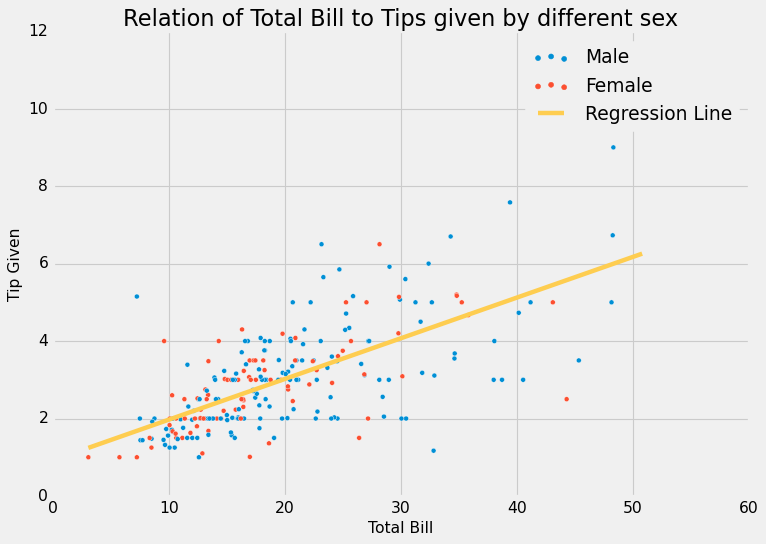

In [223]:
yhat = result.params[0] + result.params[1] * tips_bill

plt.figure(figsize = (10,7))
sns.scatterplot(x = tips['total_bill'], y = tips['tip'], hue = tips['sex'])
sns.lineplot(x = tips['total_bill'], y = yhat, c = '#fecd50', label = 'Regression Line')
plt.title('Relation of Total Bill to Tips given by different sex')
plt.xlabel('Total Bill')
plt.ylabel('Tip Given')

Text(0, 0.5, 'Tip Given')

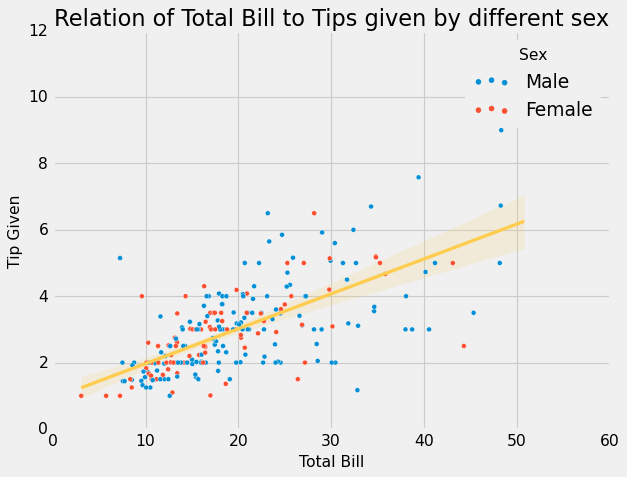

In [224]:
sns.regplot(x = tips['total_bill'], y = tips['tip'], line_kws = {'color':'#fecd50', 'lw' : 3}, scatter = False)
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')
plt.legend(title = 'Sex')
plt.title('Relation of Total Bill to Tips given by different sex')
plt.xlabel('Total Bill')
plt.ylabel('Tip Given')

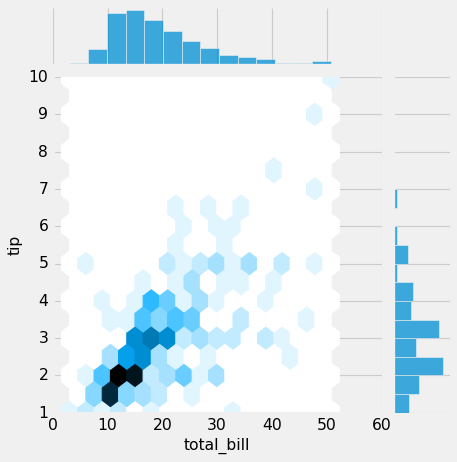

In [225]:
sns.jointplot(x = tips['total_bill'],y = tips['tip'], kind = 'hex')

In [226]:
tips_copy = tips.copy()
tips_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [227]:
tips_copy['smoker'] = tips_copy['smoker'].map({'Yes' : 1, 'No' : 0})
tips_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


In [228]:
smokers = tips_copy[tips_copy['smoker'] == 1]
smokers.head()

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,1,Sat,Dinner,4
58,11.24,1.76,Male,1,Sat,Dinner,2
60,20.29,3.21,Male,1,Sat,Dinner,2
61,13.81,2.00,Male,1,Sat,Dinner,2
62,11.02,1.98,Male,1,Sat,Dinner,2


<Axes: xlabel='sex', ylabel='count'>

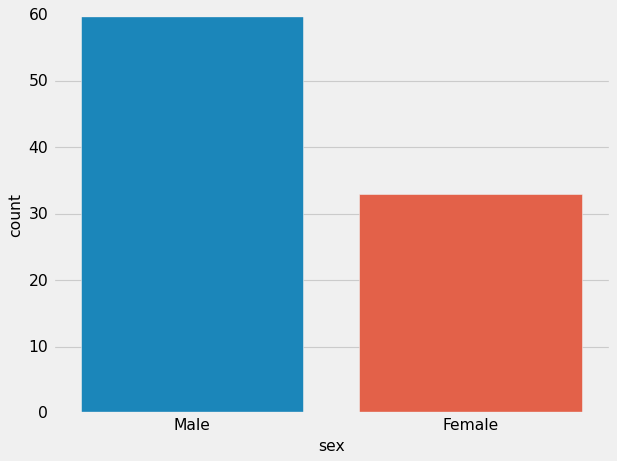

In [229]:
sns.countplot(x = smokers['sex'])

<Axes: xlabel='sex', ylabel='total_bill'>

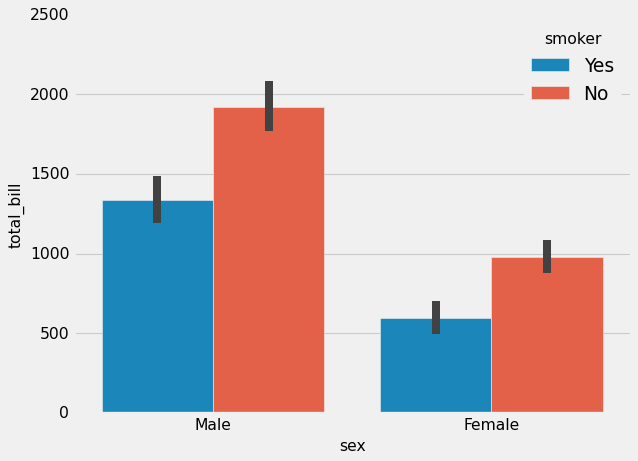

In [230]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.sum, hue = 'smoker')

(0.0, 80.0)

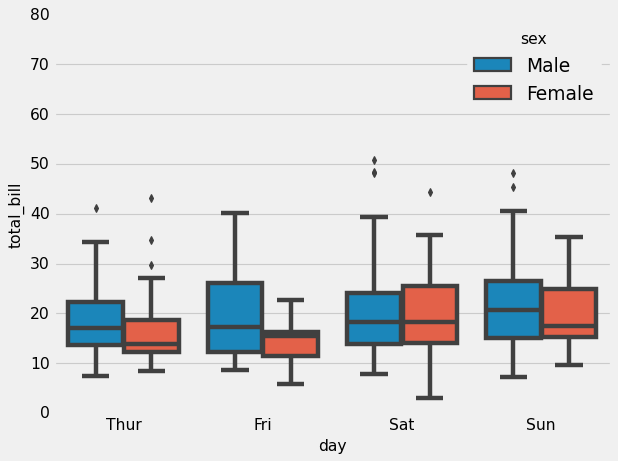

In [231]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex')
plt.ylim(0,80)

<Axes: xlabel='total_bill', ylabel='tip'>

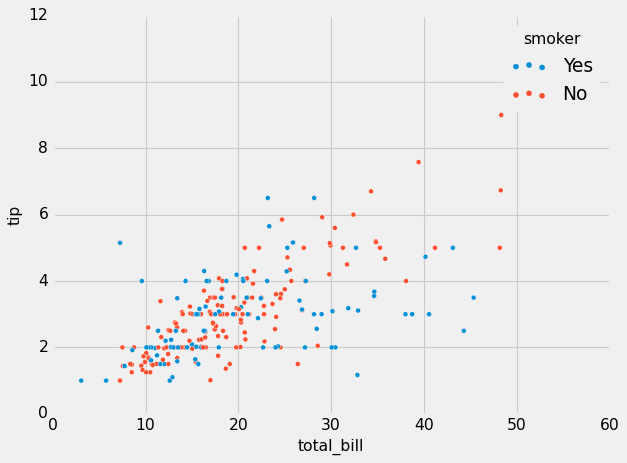

In [232]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker')

<Axes: xlabel='day', ylabel='total_bill'>

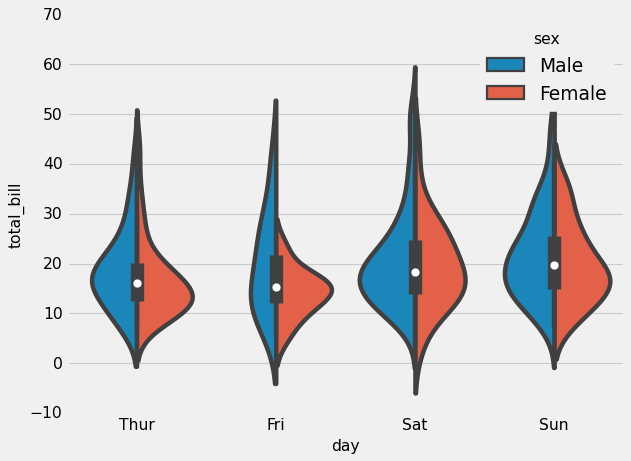

In [233]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

(0.0, 70.0)

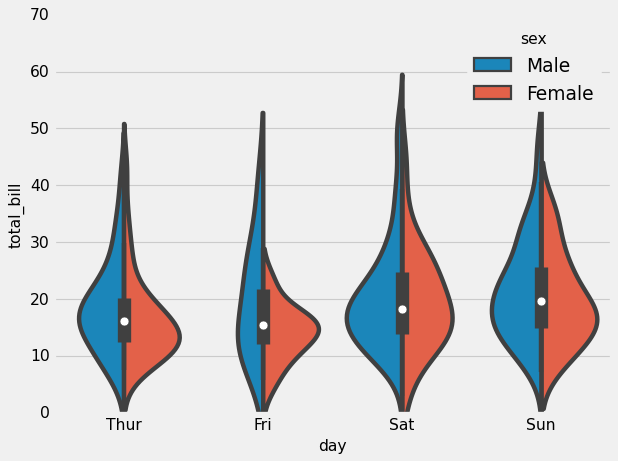

In [234]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)
#sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')
#plt.legend(loc='upper center')
plt.ylim(0,70)

In [235]:
tc = tips.corr(numeric_only = True)

<Axes: >

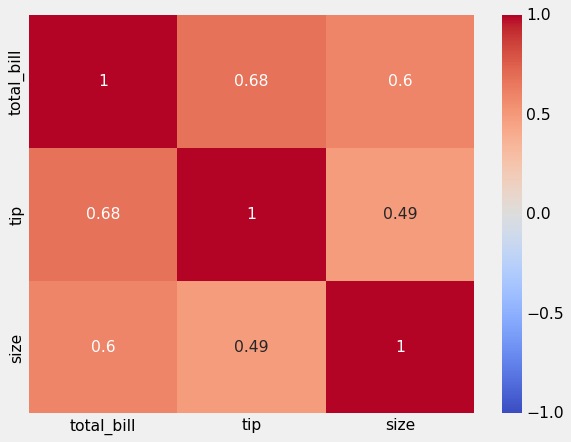

In [236]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm', vmin = -1)

In [237]:
#plt.style.use('classic')
#g = sns.FacetGrid(data = tips, col = 'smoker', row = 'sex')
#g.map(sns.distplot, 'total_bill')

Text(45.630797916666666, 0.5, 'Tip Given')

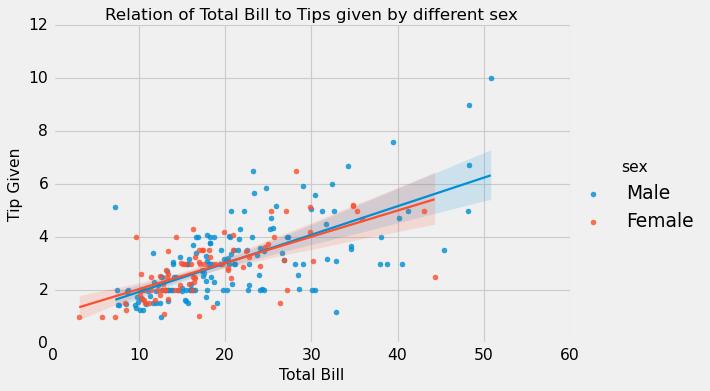

In [254]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', line_kws = {'linewidth' : 2}, 
           height = 5, aspect = 1.5)
plt.title('Relation of Total Bill to Tips given by different sex', fontsize = 15)
plt.xlabel('Total Bill')
plt.ylabel('Tip Given')

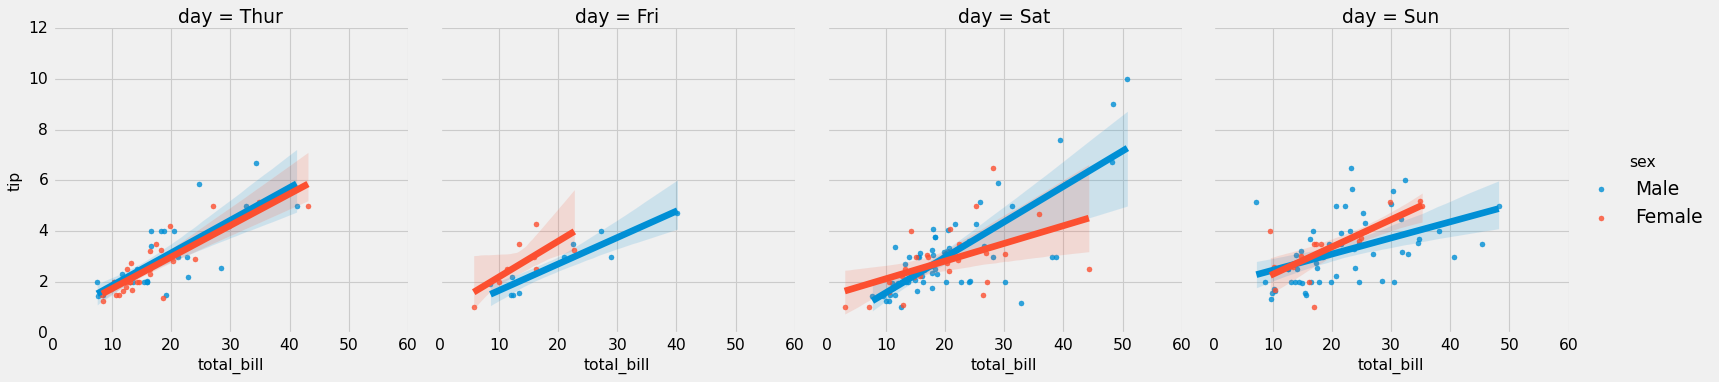

In [259]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex') 

In [262]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [263]:
cf.go_offline()

In [264]:
df = tips.copy()

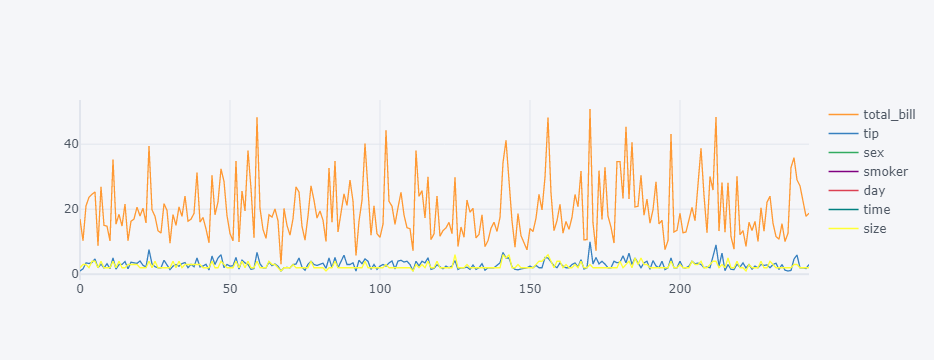

In [266]:
df.iplot()

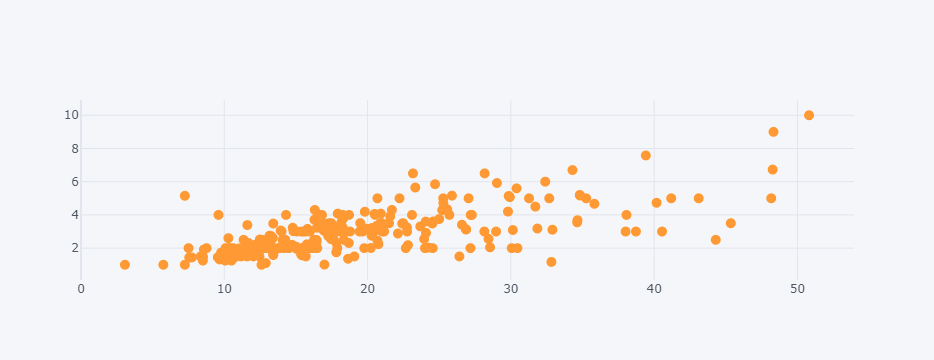

In [270]:
df.iplot(kind = 'scatter', x = 'total_bill', y = 'tip', mode = 'markers', size = 10)

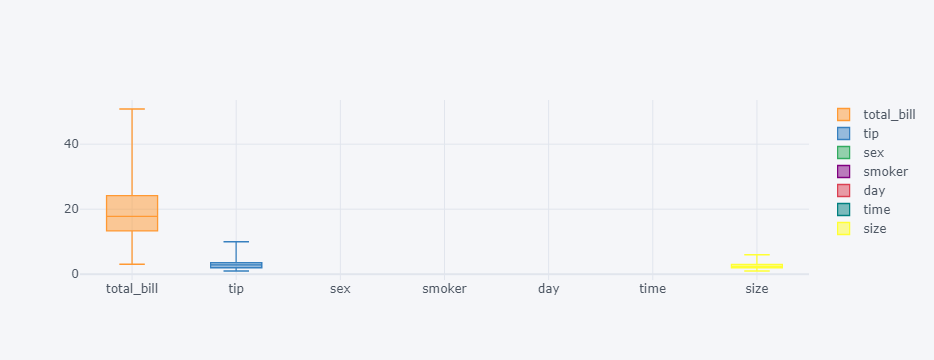

In [276]:
df.iplot(kind = 'box', x = 'day', y = 'total_bill')